# Trabalho prático I - Aplicação de técnicas de agrupamento

Nesse trabalho aplicaremos técnicas de aprendizado não-supervisionado em dados do [Yelp](https://drive.google.com/file/d/1dYJFszSL_oSoBLRoZGZPBvgywVcvL1M0/view?usp=sharing) (Ver detalhes sobre o Yelp Challenge [aqui](https://www.yelp.com/dataset/challenge)).

O objetivo principal é encontrar distritos culinários na cidade de Las Vegas (Estados Unidos).
No contexto desse trabalho, distritos culinários são caracterizados por um conjunto de restaurantes que simultaneamente estão próximos (geograficamente) e são similares (com respeito à comida que servem).

O trabalho está dividido em duas partes. Em cada uma delas, vocês deverão utilizar uma parte diferente do conjunto de dados. Mais detalhes, nas seções a seguir.

Além disso, vocês deverão utilizar _Python_ e _Jupyter Notebooks_, de forma que todos os resultados estarão em um _notebook_ (este aqui que vocês estão lendo). Vocês estarão livres para escolher as bibliotecas que preferirem.

Sobre o trabalho:

**Grupo:** de até 3 pessoas. Mantenha em mente que 2 pessoas no mesmo grupo neste trabalho não poderão estar no mesmo grupo no trabalho 2. Pode haver repetição com relação aos grupos das listas.

**Data de entrega:** **23 de maio de 2018** (para ambas as partes) até às **18 horas**.

**Forma de entrega:** Vocês deverão enviar esse notebook (com código, resultados e discussões) para o e-mail do professor. É importante ressaltar que seu notebook tem que ser executável, i.e., resultados (gráficos, tabelas e números) devem ser gerados novamente ao executar o código do notebook a partir do conjunto de dados originais. **A Falha desse último ponto implicará em nota zero!**

**Versão do Python:** Python 2 ou Python 3. Apenas indiquem no início do trabalho qual foi escolhida.



## Parte I

No arquivo `yelp_academic_dataset_business.json` estão contidas informações sobre vários estabelecimentos comerciais do conjunto de dados do Yelp, incluindo várias cidades e tipos de estabelecimento que não temos interesse nesse trabalho. Em cada linha do arquivo há uma _string_ contendo um _json_ referente a cada estabelecimento.

Abaixo, uma exemplo de _json_. Veja que:
-  O atributo `city` identifica a cidade
-  O atributo `business_id` é um identificador único no conjunto de dados em todos os arquivos
-  Os atributos `latitude` e `longitude` estão disponíveis
-  O atributo `categories` caracteriza o ramo de atividade. Todos os restaurantes têm a categoria 'Restaurants' nesse atributo. Além disso, o tipo de culinária de cada restaurante é descrito nesse atributo.

In [12]:
import json
line = '{"city": "Las Vegas", "neighborhood": "Southeast", "name": "Flight Deck Bar & Grill", "business_id": "Pd52CjgyEU3Rb8co6QfTPw", "longitude": -115.1708484, "hours": {"Monday": "8:30-22:30", "Tuesday": "8:30-22:30", "Friday": "8:30-22:30", "Wednesday": "8:30-22:30", "Thursday": "8:30-22:30", "Sunday": "8:30-22:30", "Saturday": "8:30-22:30"}, "state": "NV", "postal_code": "89119", "categories": ["Nightlife", "Bars", "Barbeque", "Sports Bars", "American (New)", "Restaurants"], "stars": 4.0, "address": "6730 S Las Vegas Blvd", "latitude": 36.0669136, "review_count": 13, "attributes": {"Alcohol": "full_bar", "HasTV": true, "NoiseLevel": "average", "RestaurantsAttire": "casual", "BusinessAcceptsCreditCards": true, "Music": {"dj": false, "background_music": true, "no_music": false, "jukebox": false, "live": false, "video": false, "karaoke": false}, "Ambience": {"romantic": false, "intimate": false, "classy": false, "hipster": false, "divey": false, "touristy": false, "trendy": false, "upscale": false, "casual": true}, "RestaurantsGoodForGroups": true, "Caters": true, "WiFi": "free", "RestaurantsReservations": false, "BikeParking": true, "RestaurantsTakeOut": true, "GoodForKids": true, "HappyHour": true, "GoodForDancing": false, "RestaurantsTableService": true, "OutdoorSeating": false, "RestaurantsPriceRange2": 2, "RestaurantsDelivery": false, "BestNights": {"monday": false, "tuesday": false, "friday": false, "wednesday": true, "thursday": false, "sunday": false, "saturday": false}, "GoodForMeal": {"dessert": false, "latenight": false, "lunch": true, "dinner": false, "brunch": false, "breakfast": false}, "BusinessParking": {"garage": false, "street": false, "validated": false, "lot": true, "valet": false}, "CoatCheck": false, "Smoking": "no", "WheelchairAccessible": true}, "is_open": 1}'
#print(json.dumps(json.loads(line), indent = 3))

A partir dos dados descritos, você deve encontrar distritos culinários em Las Vegas. Encontre grupos considerando que a similaridade entre restaurantes pode ser inferida pelo atributo `categories` e a proximidade através dos atributos `latitude` e `longitude`.

**a)** Proponha uma representação apropriada para os dados. Justifique sua escolha

**b)** Utilize técnicas de agrupamento para encontrar distritos culinários. É obrigatório o uso de pelo menos quatro técnicas:
-  k-means
-  Agrupamento hierárquico
-  GMM (Gaussian Mixture Model)
-  Agrupamento Espectral

**Sugestão:** Todas já estão implementadas na biblioteca _sklearn_

**c)** Apresente uma justificativa plausível para o número de grupos utilzado no item anterior

**d)** Apresente o `dendrograma` para o resultado do agrupamento hierárquico

**e)** Baseado no conteúdo de cada grupo, proponha uma forma sistemática de encontrar _rótulos_ para cada grupo. Veja que se dois grupos forem identificado pelo mesmo rótulo há um problema (com o resultado de seu agrupamento ou com sua forma de rotular grupos)

**f)** Faça um gráfico para cada agrupamento obtido da seguinte forma:
-  cada restaurante será um ponto no plano de acordo com suas coordenadas geográficas
-  a cor de cada ponto será diferente para grupos diferentes
-  cada grupo deve ser identificado com seu respectivo rótulo encontrado no item anterior (e.g., através de uma legenda de cor)

**g)** Comente os resultados. Comente também as diferenças de cada agrupamento

**Observação:** sua criatividade para gerar visualizações informativas e de qualidade será parte da avaliação.


In [2]:
# code for part I starts here

/home/necropsy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


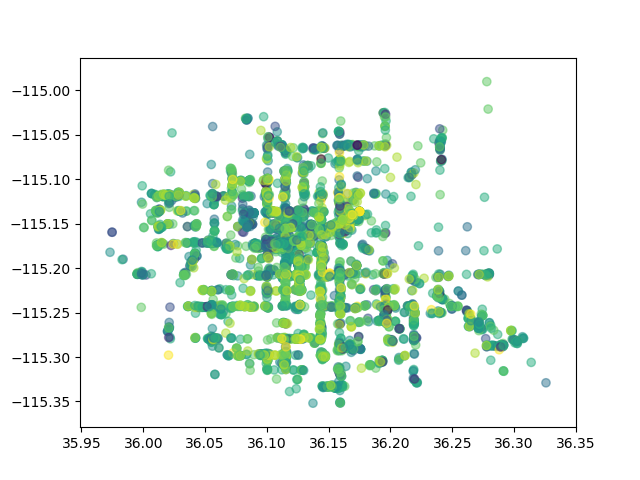

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#Configurando e Representando os Dados-----------------------------------------------------------------------------
data = pd.read_json('yelp_academic_dataset_business.json', lines = True)
newBase = data.loc[(data["city"]=="Las Vegas") & data["categories"].apply(lambda x: "Restaurants" in x)]
#Limpando a base de dados:
#Removendo dados que a princípio não são significativos para
#a analise do trabalho
newBase.drop(['city', 'open', 'state', 'type', 'business_id'], axis=1, inplace=True)
newBase['categories']
#------------------------------------------------------------------------------------------------------------------

#plotando latitude x longitude analisando as estrelas recebidas
scatter_plot = plt.scatter(newBase['latitude'], newBase['longitude'], alpha=0.5, c=newBase['stars'])
plt.show()


## Parte II

O objetivo dessa parte é o mesmo da Parte I (de **(a)** a **(f)**). Mas agora, vocês não poderão utilizar o atributo `categories`. Vocês deverão "inferir as categorias" de cada restaurante a partir de seus respectivos _reviews_ no Yelp.
O arquivo `yelp_academic_dataset_review.json` contém uma coleção de _reviews_, novamente, cada linha (_review_) é um _json_, como o do exemplo abaixo.

Através do atributo `business_id` você pode identificar todos os _reviews_ 
de cada restaurante em Las Vegas. Além desse atributo, necessita-se apenas do atributo `text`, i.e., o conteúdo do _review_.




In [3]:
import json
line = '{"funny": 0, "user_id": "bv2nCi5Qv5vroFiqKGopiw", "review_id": "n6QzIUObkYshz4dz2QRJTw", "text": "Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \\n\\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \\n\\nA bit outside of downtown montreal but take the metro out and it\'s less than a 10 minute walk from the station.", "business_id": "VR6GpWIda3SfvPC-lg9H3w", "stars": 5, "date": "2016-05-28", "useful": 0, "cool": 0}'
print(json.dumps(json.loads(line), indent = 3))

{
   "funny": 0, 
   "user_id": "bv2nCi5Qv5vroFiqKGopiw", 
   "review_id": "n6QzIUObkYshz4dz2QRJTw", 
   "text": "Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \n\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \n\nA bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station.", 
   "business_id": "VR6GpWIda3SfvPC-lg9H3w", 
   "stars": 5, 
   "date": "2016-05-28", 
   "useful": 0, 
   "cool": 0
}


In [4]:
# code for part II starts here